# Logistic regression using `statsmodels`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/home/gc/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ILPD_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv'

In [3]:
var_names = [
    'age',
    'sex',
    'total_bilirubin',
    'direct_bilirubin',
    'alp',  # Alkaline phosphatase
    'alt',  # Alanine transaminase
    'ast',  # Aspartate transaminase
    'total_protein',
    'albumin',
    'ag_ratio',  # Albumin/globulin ratio
    'liver_disease'
]

Read in the [Indian Liver Patient Dataset (ILPD)](https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29) from `ILPD_URL`.

In [4]:
ilpd = pd.read_csv(ILPD_URL, header=None, names=var_names)

Perform some basic data exploration.

In [5]:
ilpd.describe()

,age,total_bilirubin,direct_bilirubin,alp,alt,ast,total_protein,albumin,ag_ratio,liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
ilpd['liver_disease'].value_counts()

1    416
2    167
Name: liver_disease, dtype: int64

Since the [dataset description](https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29) states that it 'contains 416 liver patient records and 167 non liver patient records', we conclude that a value of 1 corresponds to liver disease.

In [7]:
ilpd['liver_disease'] = (ilpd['liver_disease'] == 1).astype(int)

In [8]:
ilpd['liver_disease'].value_counts()

1    416
0    167
Name: liver_disease, dtype: int64

There are some missing values in `ag_ratio`; let's investigate.

In [9]:
ilpd[ilpd['ag_ratio'].isnull()]

,age,sex,total_bilirubin,direct_bilirubin,alp,alt,ast,total_protein,albumin,ag_ratio,liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


Let's remove them for the time being...

In [10]:
ilpd.dropna(inplace=True)

Explore the data visually.

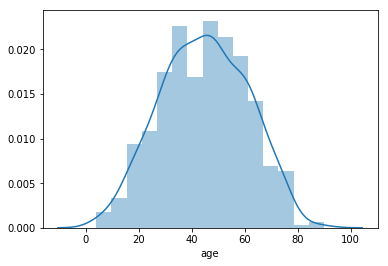

In [11]:
sns.distplot(ilpd['age'])

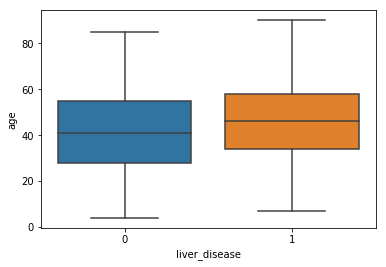

In [12]:
sns.boxplot(x='liver_disease', y='age', data=ilpd)

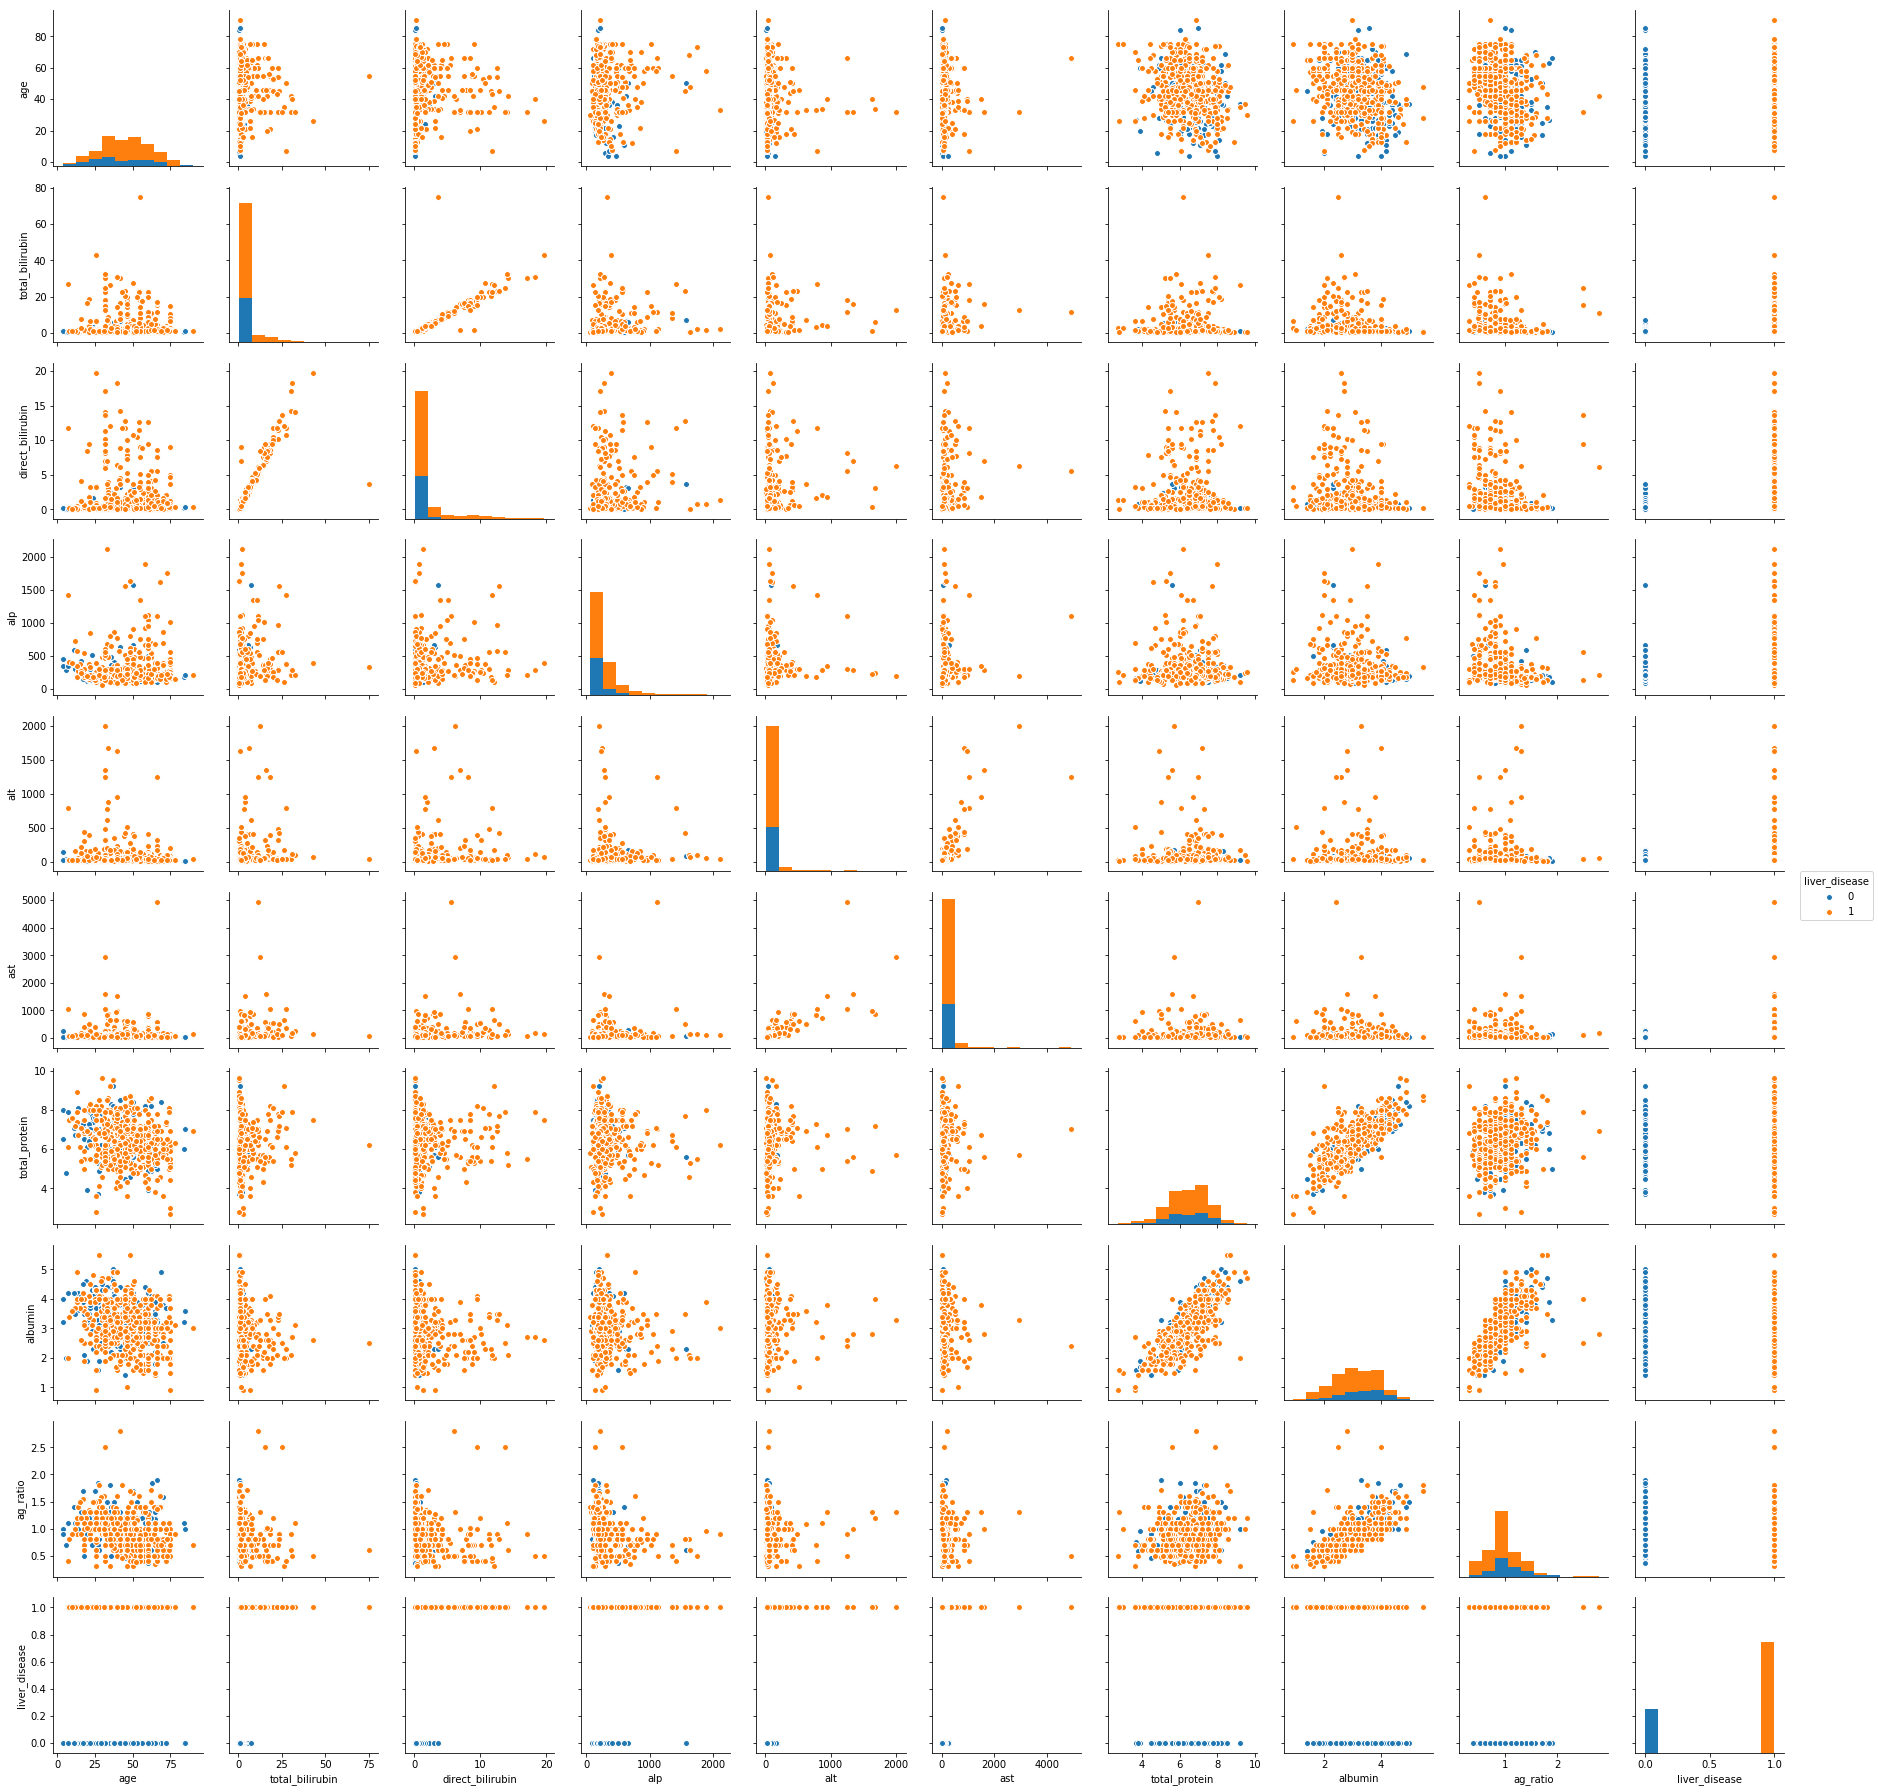

In [13]:
sns.pairplot(ilpd, hue='liver_disease')

Build a logistic regression model including all predictors.

In [14]:
model_full = smf.glm(
    'liver_disease ~ age + sex + total_bilirubin + direct_bilirubin + alp + alt + ast + total_protein + albumin + ag_ratio',
    data=ilpd,
    family=sm.families.Binomial()
).fit()

In [15]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          liver_disease   No. Observations:                  579
Model:                            GLM   Df Residuals:                      568
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -283.97
Date:                Tue, 10 Apr 2018   Deviance:                       567.94
Time:                        09:51:50   Pearson chi2:                     707.
No. Iterations:                     8                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.6046      1.330     -2.711      0.007      -6.211      -0.998
sex[T.Male]          0.0310      0.233      0.133      0.894      -0.425       0.487
age                  0.0183      0.006      2.868      0.004       0.006       0.031
total_bilirubin      0.0112      0.087      0.129      0.897      -0.159       0.182
direct_bilirubin     0.4497      0.241      1.862      0.063      -0.024       0.923
alp                  0.0013      0.001      1.572      0.116      -0.000       0.003
alt                  0.0119      0.005      2.339      0.019       0.002       0.022
ast                  0.0025      0.003      0.793      0.428      -0.004       0.009
total_protein        0.9274      0.381      2.431      0.015       0.180       1.675
albumin             -1.6951      0.748     -2.266      0.023      -3.161      -0.229
ag_ratio             1.8081      1.141      1.585      0.113      -0.428       4.044
====================================================================================
"""

Drop predictors that are not statistically significant ($p > 0.05$).

In [16]:
model_sig = smf.glm(
    'liver_disease ~ age + alt + total_protein + albumin',
    data=ilpd,
    family=sm.families.Binomial()
).fit()

In [17]:
model_sig.summary()

/home/gc/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:1003: RuntimeWarning: divide by zero encountered in true_divide
  return scale * np.sum((endog * np.log(mu/(1 - mu) + 1e-200) +
/home/gc/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:1004: RuntimeWarning: divide by zero encountered in log
  np.log(1 - mu)) * freq_weights)
/home/gc/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:1004: RuntimeWarning: invalid value encountered in add
  np.log(1 - mu)) * freq_weights)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          liver_disease   No. Observations:                  579
Model:                            GLM   Df Residuals:                      574
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Apr 2018   Deviance:                       598.58
Time:                        09:51:50   Pearson chi2:                     584.
No. Iterations:                     8                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.4126      0.760     -1.860      0.063      -2.901       0.076
age               0.0187      0.006      2.942      0.003       0.006       0.031
alt               0.0206      0.004      5.063      0.000       0.013       0.029
total_protein     0.5768      0.164      3.516      0.000       0.255       0.898
albumin          -0.9886      0.228     -4.345      0.000      -1.435      -0.543
=================================================================================
"""

Print out and interpret the odds ratios.

In [18]:
np.exp(model_sig.params)

Intercept        0.243505
age              1.018863
alt              1.020833
total_protein    1.780412
albumin          0.372115
dtype: float64

Plot the distribution of the fitted values.

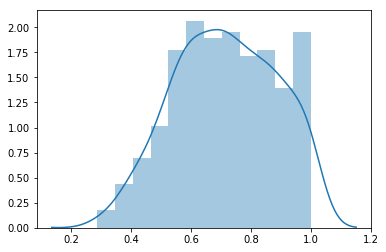

In [19]:
sns.distplot(model_sig.fittedvalues)

Assuming a 50% cut-off value for the probability of being forged, compare the fitted values to the outcome.

*Hint*: use `pd.crosstab` to produce a two-by-two table.

In [20]:
pd.crosstab(model_sig.fittedvalues > 0.5, ilpd['liver_disease'])

liver_disease,0,1
row_0,,
False,35,29
True,130,385
